In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.cm as cm

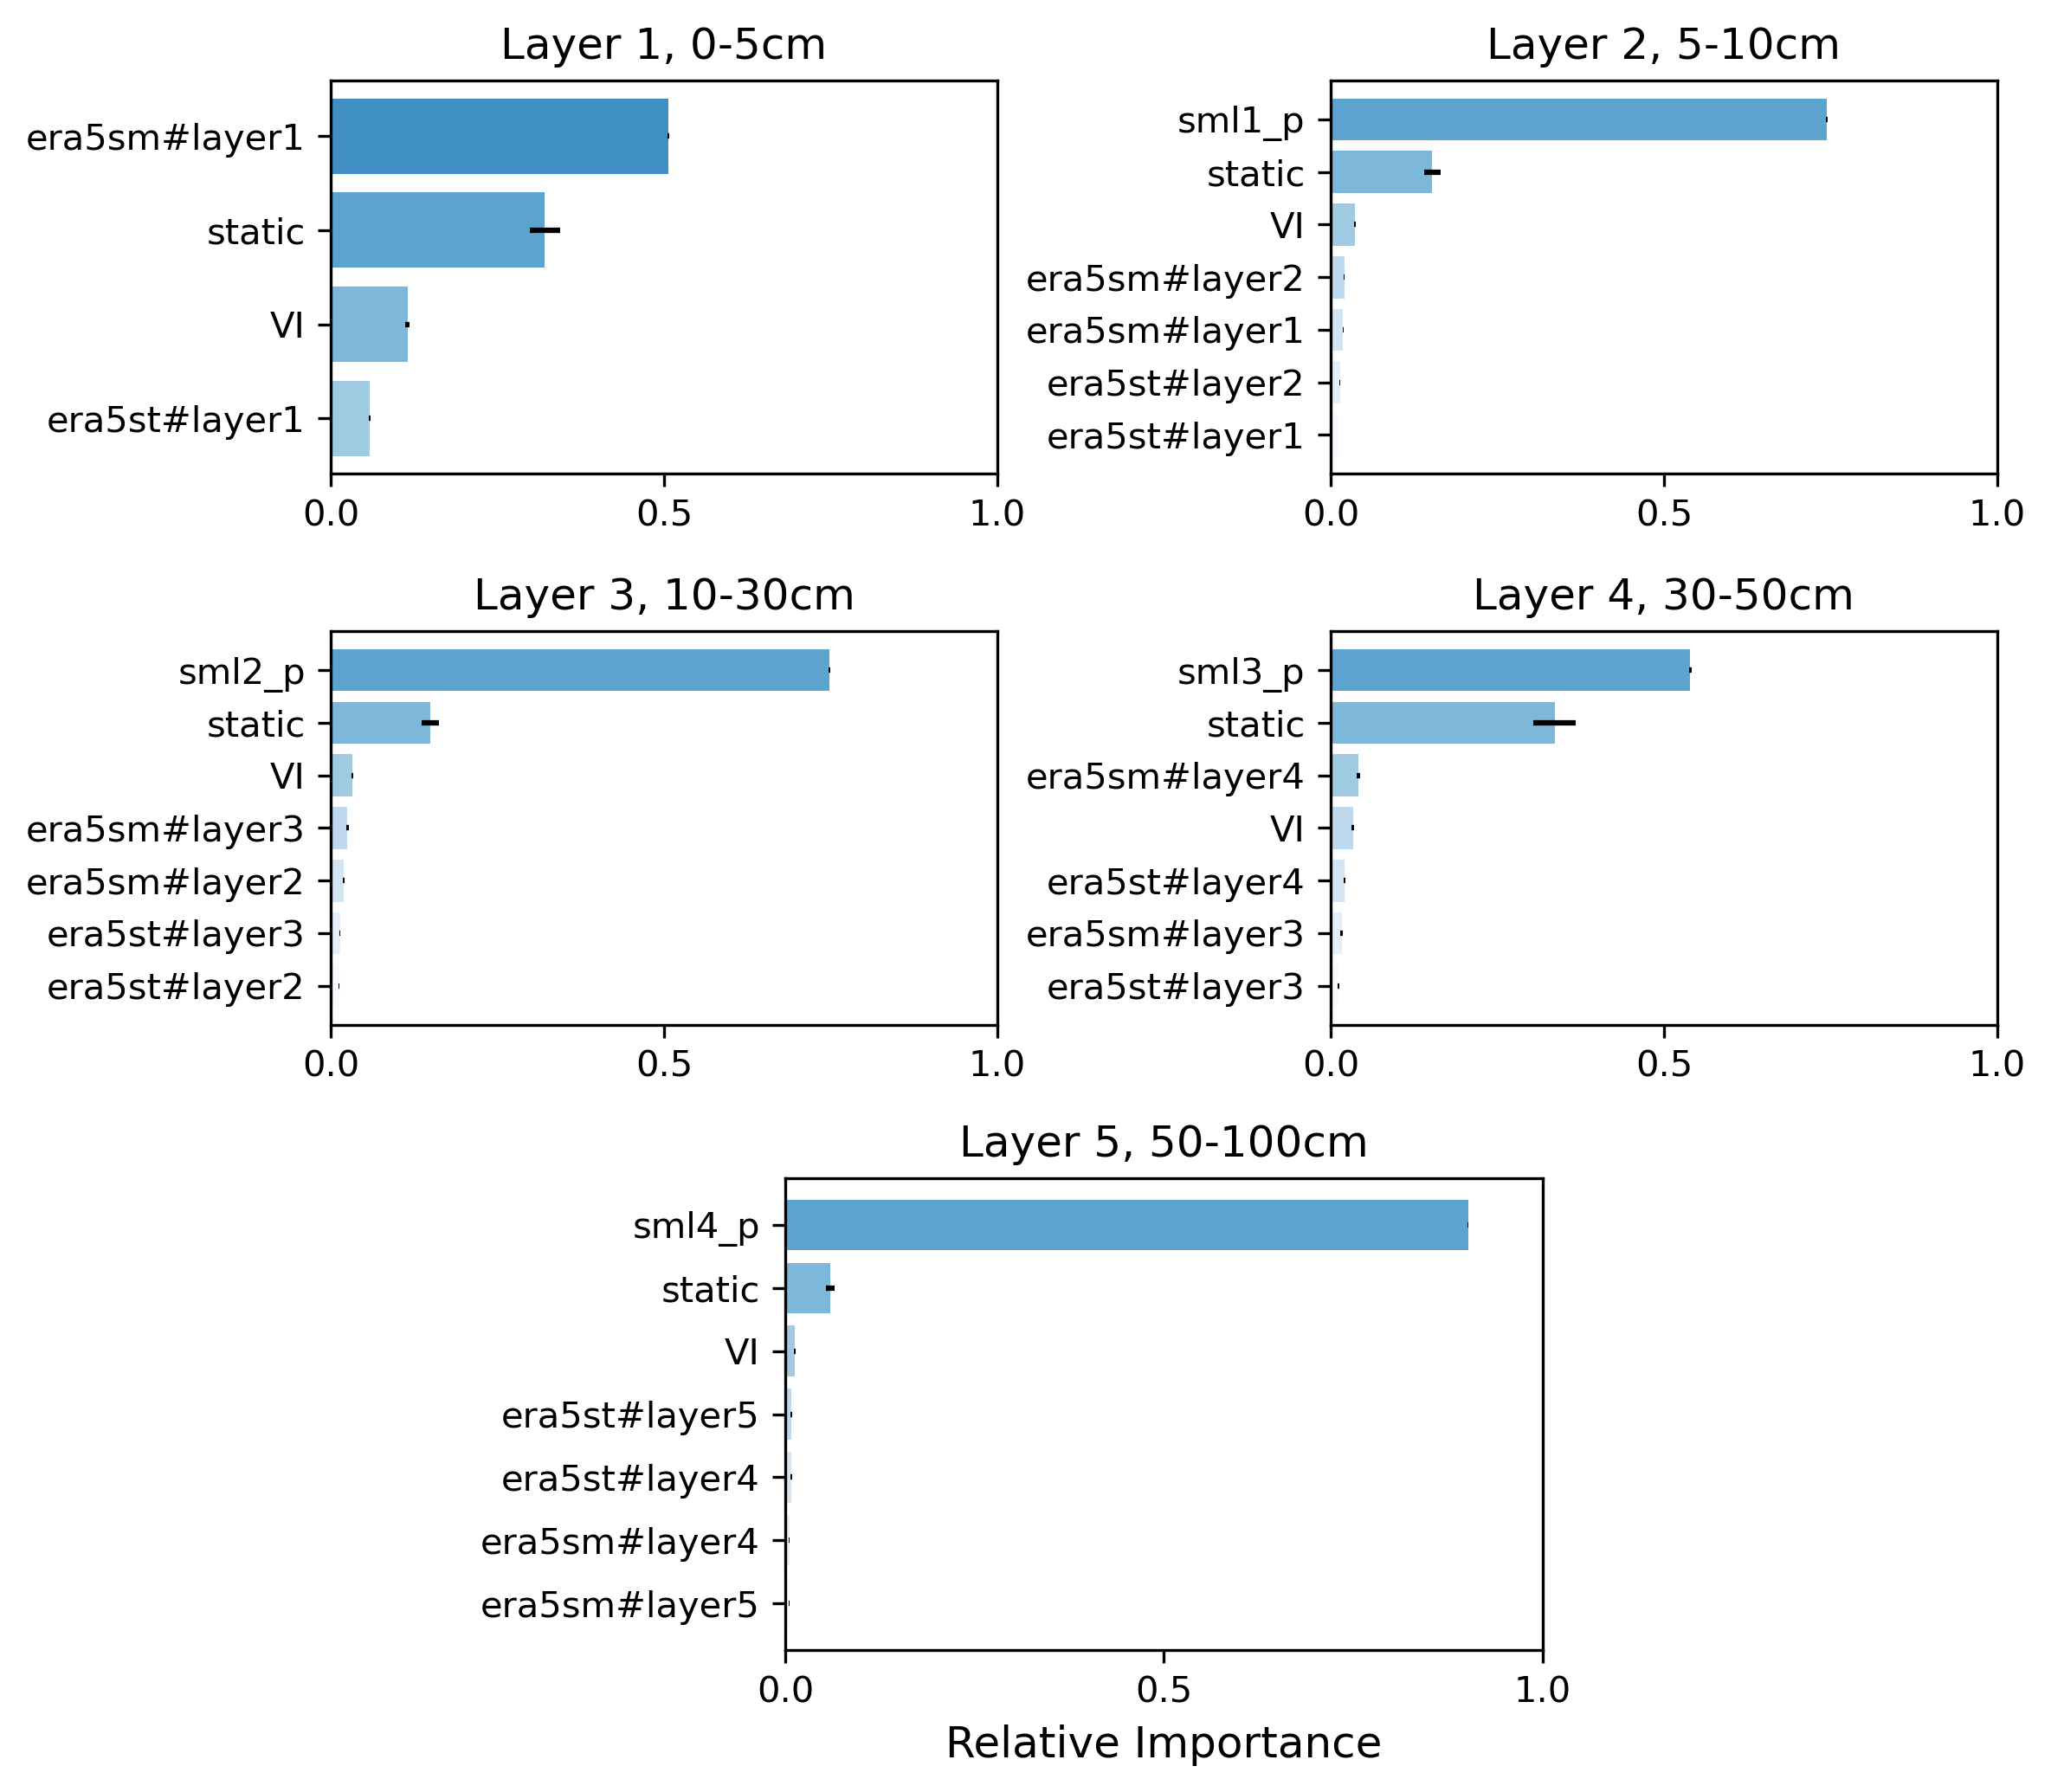

In [3]:
out_main_folder ="../plotdata"
df_all = pd.DataFrame()
layer_list = [f'layer{i}' for i in range(1,6)]
Layer_list = ['Layer 1','Layer 2','Layer 3','Layer 4','Layer 5']
depths = ['0-5cm', '5-10cm', '10-30cm', '30-50cm', '50-100cm']
fig = plt.figure(figsize=(8, 7),dpi=300)
gs  = gridspec.GridSpec(2, 1,height_ratios=[2,1])
gs0 = gridspec.GridSpecFromSubplotSpec(2,2, subplot_spec=gs[0],
                                        hspace=0.4, wspace=0.5)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[1],
                                        hspace=0.4, wspace=0.5)
fts=8
c1=range(5,9)
c2=range(1,9)
norm = plt.Normalize(1, 12) 
cmap = cm.Blues
label_tick_siez = 12.5
font_size = 15
title_h_space = 1.06 
for idx,layer_name in enumerate(layer_list):
    df = pd.read_csv(os.path.join(out_main_folder,f'{layer_name}_Feature_importance.csv'))
    filter_fea = ['dem', 'lon','slope','lat','EVI','NDVI',
                  f'sand#layer{idx+1}',f'clay#layer{idx+1}',f'bd#layer{idx+1}',f'fca#layer{idx+1}']
    mask = ~df['feature_list'].isin(filter_fea)
    df_filtered = df[mask]
    df_filtered = df_filtered.sort_values('importances')
    colors=cmap(norm(c2))
    if idx<4:
        ax = fig.add_subplot(gs0[idx])
    if idx==0:
        colors=cmap(norm(c1))
    if idx==4:
        ax = fig.add_subplot(gs1[1:3])
    ax.barh(
        range(len(df_filtered)),
        df_filtered['importances'],
        xerr=df_filtered['std'],
        align='center',
        color=colors,
    )
                         
    ax.set_title(Layer_list[idx]+', '+depths[idx])
    ax.set_yticks(range(len(df_filtered)),df_filtered['feature_list'])
    ax.set_xlim(0,1)
    ax.set_xticks([0,0.5,1])
    if idx==4:
        ax.set_xlabel('Relative Importance',fontsize=12)
plt.tight_layout()
# plt.savefig('../Figures/Figure3.jpg',
#             dpi=600,bbox_inches='tight')